<a href="https://colab.research.google.com/github/Anikethb05/Quantum-Computing/blob/main/density_matrices_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!pip install qiskit qiskit-aer pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 70.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 103.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 94.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.4 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=9f9544b5a4be867bf64e793cd3a74219b581b8f6fb9ac5cf171e42ad8cb2b2e5
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178beee1939180d46
Successfully built pylatexenc


In [9]:
from qiskit.quantum_info import DensityMatrix, Statevector, partial_trace
import numpy as np
from qiskit.visualization import plot_state_city
from qiskit import QuantumCircuit
import numpy as np
import matplotlib.pyplot as plt


In [10]:
def calculate_purity(rho):
  rho_squared=rho.data @ rho.data
  purity=np.trace(rho_squared)
  return purity

#### Pure State

In [11]:
rho_pure=DensityMatrix.from_label('0')
purity_calculated=calculate_purity(rho_pure)
purity_builtin=rho_pure.purity()
print(f"Calculated Purity = {purity_calculated:.6f}")
Built_in=rho_pure.purity()
print(f"Built-in Purity = {Built_in:.6f}")

Calculated Purity = 1.000000+0.000000j
Built-in Purity = 1.000000+0.000000j


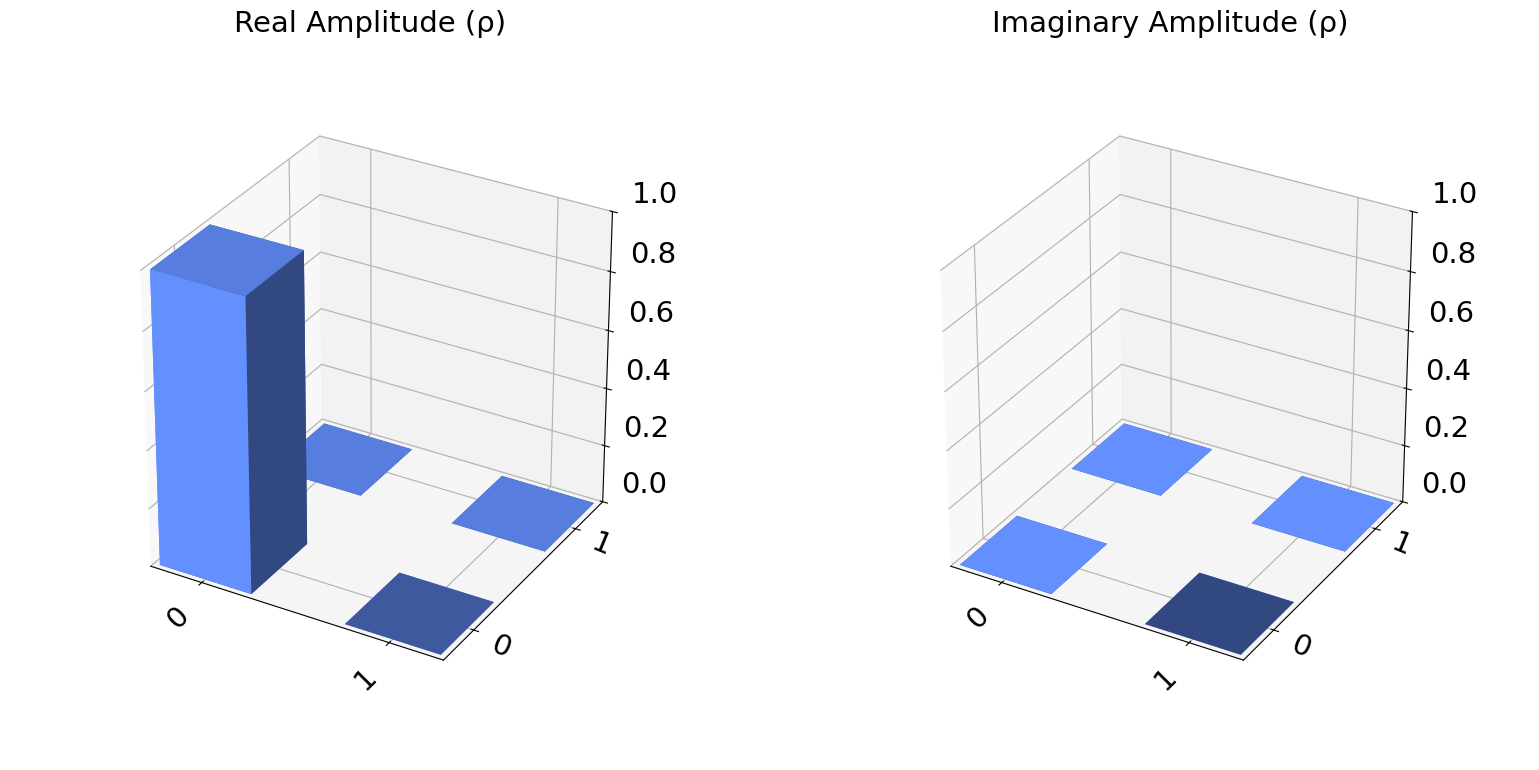

In [12]:
plot_state_city(rho_pure)

#### Mixed State

In [13]:
rho_0=DensityMatrix.from_label('0')
rho_1=DensityMatrix.from_label('1')
rho_mixed=0.6*rho_0+0.4*rho_1
purity_calculated=calculate_purity(rho_mixed)
purity_builtin=rho_mixed.purity()
print(f"Calculated Purity = {purity_calculated:.6f}")
Built_in=rho_mixed.purity()
print(f"Built-in Purity = {Built_in:.6f}")

Calculated Purity = 0.520000+0.000000j
Built-in Purity = 0.520000+0.000000j


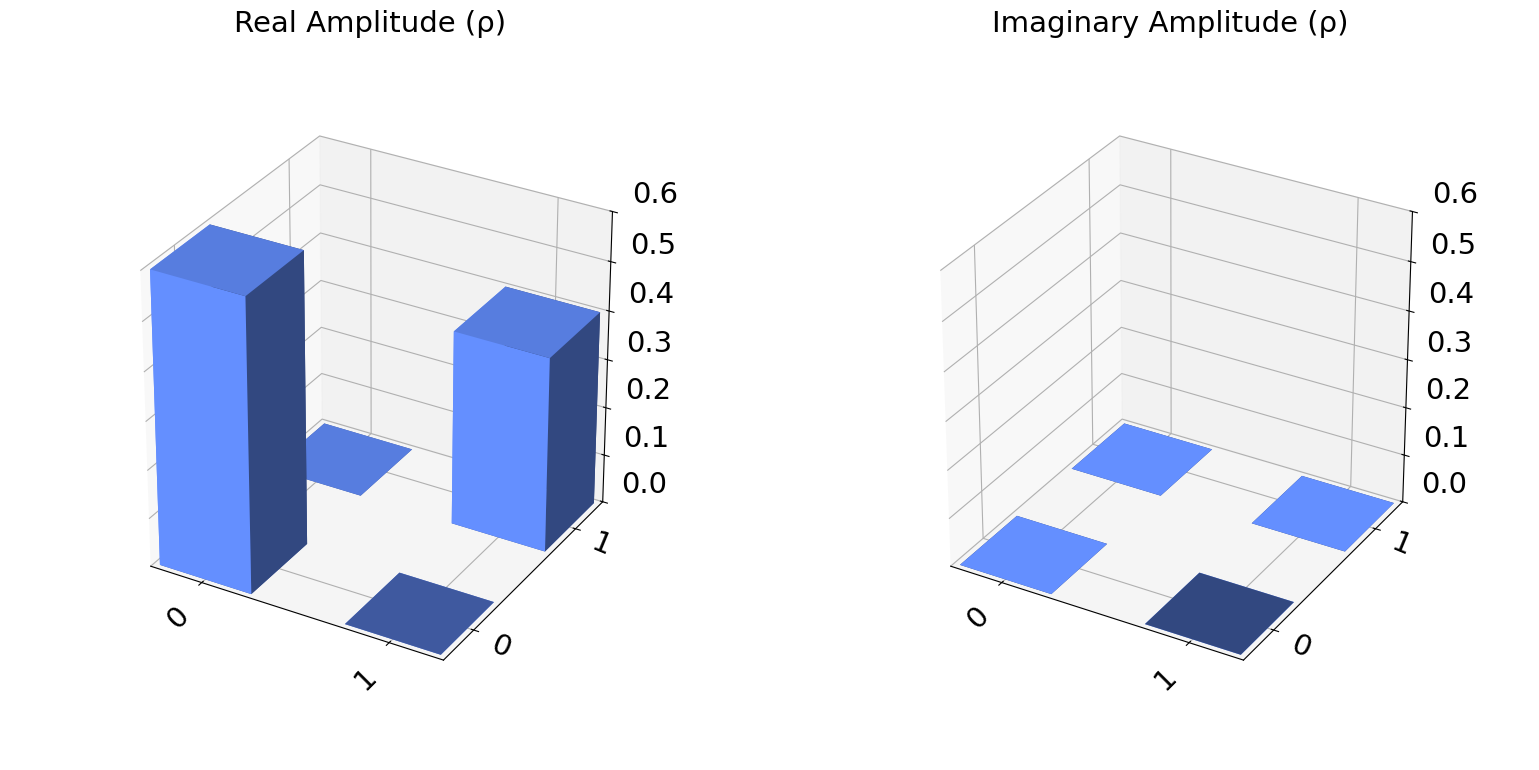

In [14]:
plot_state_city(rho_mixed)

In [15]:
def entanglement_create_mixed_states():
  qc=QuantumCircuit(2)
  qc.h(0)
  qc.cx(0,1)
  bell_state=Statevector.from_instruction(qc)
  rho_bell=DensityMatrix(bell_state)

  print(f"Bell State purity : {rho_bell.purity():.3f}")

  #Trace out qubit 1 - we get MIXED STATE for qubit 0
  rho_qubit0=partial_trace(rho_bell,[1])
  print(f"Qubit 0 purity after partial trace : {rho_qubit0.purity():.3f}") # 0.5

  #Trace out qubit 0 - we get MIXED STATE for qubit 1
  rho_qubit1=partial_trace(rho_bell,[0])
  print(f"Qubit 1 purity after partial trace : {rho_qubit1.purity():.3f}") # 0.5

In [16]:
entanglement_create_mixed_states()

Bell State purity : 1.000+0.000j
Qubit 0 purity after partial trace : 0.500+0.000j
Qubit 1 purity after partial trace : 0.500+0.000j


In [17]:

# Create superposition state |+⟩ = (|0⟩ + |1⟩)/√2
psi_plus = Statevector.from_label('+')
rho_plus = DensityMatrix(psi_plus)
print(f"Initial |+⟩ state purity: {rho_plus.purity():.3f}")  # Should be 1.0 (pure)

# After measurement (Z-basis), we either get |0⟩ or |1⟩ with 50% probability each
# If we don't know the measurement outcome, the system becomes a mixed state
rho_after_measurement = 0.5 * DensityMatrix.from_label('0') + 0.5 * DensityMatrix.from_label('1')

print(f"After unknown Z-measurement purity: {rho_after_measurement.purity():.3f}")  # Should be 0.5 (mixed)
print("Before knowing measurement result, our best description is mixed!")






Initial |+⟩ state purity: 1.000+0.000j
After unknown Z-measurement purity: 0.500+0.000j
Before knowing measurement result, our best description is mixed!


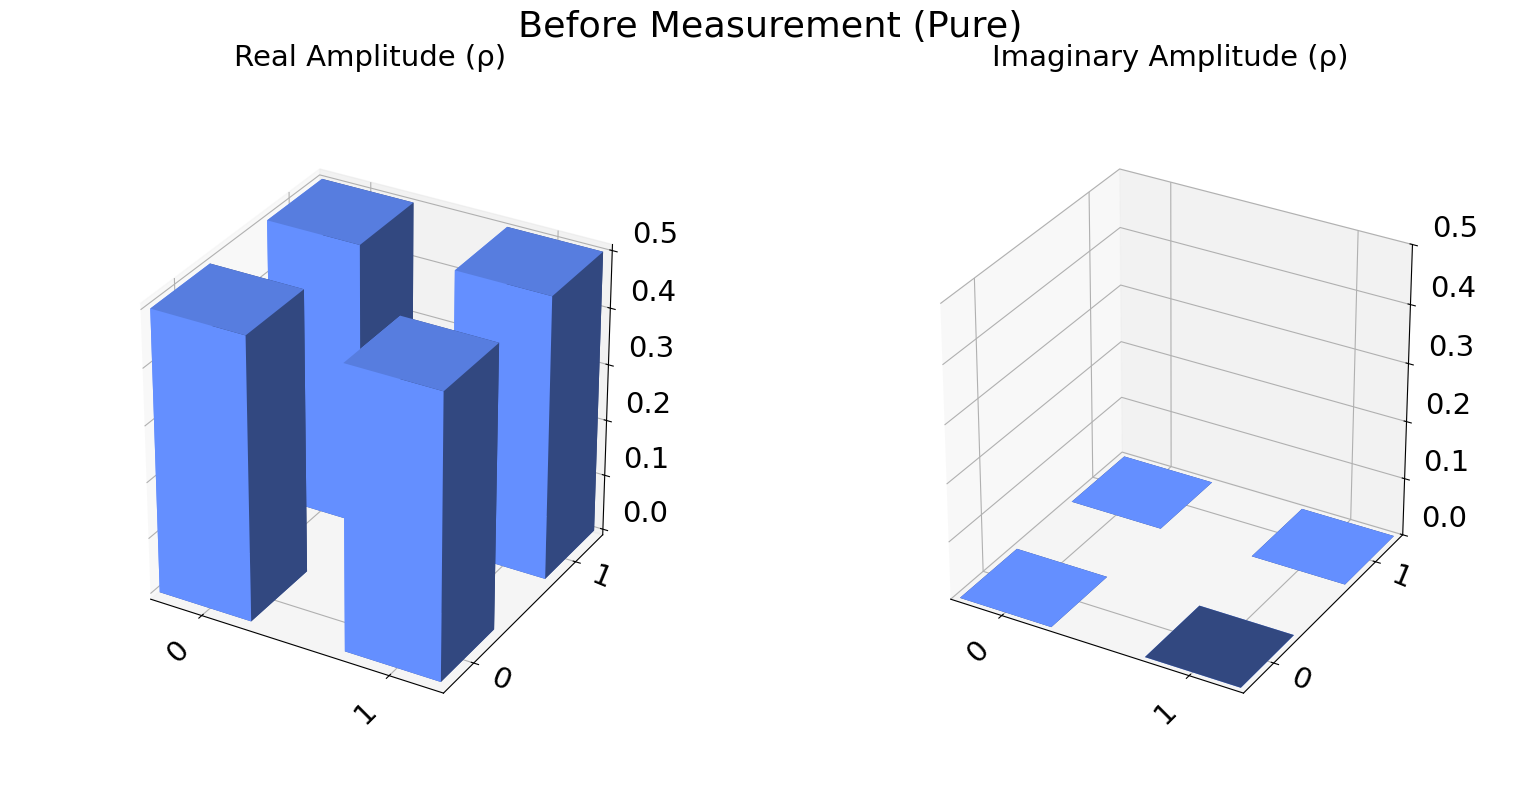

In [18]:
# Visualize the difference between pure and mixed state
plot_state_city(rho_plus, title="Before Measurement (Pure)")


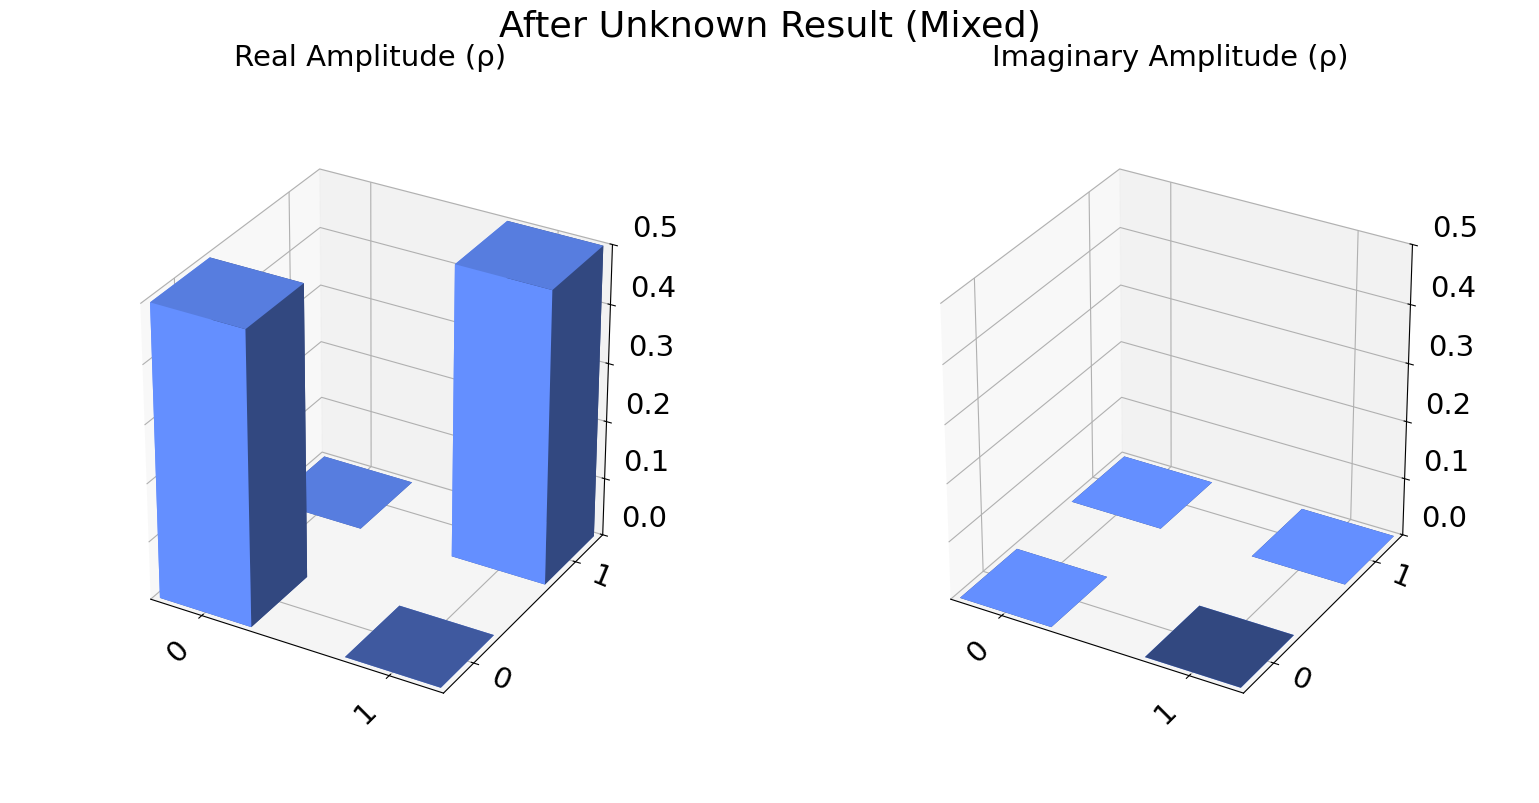

In [19]:
plot_state_city(rho_after_measurement, title="After Unknown Result (Mixed)")

## Question 1:
Create mixed states with these probability distributions:
#### a) 80% |0⟩, 20% |1⟩
#### b) 30% |0⟩, 70% |1⟩
#### c) 45% |0⟩, 55% |1⟩
For each state:
1. Calculate the purity using Tr(ρ^2)
2. Verify using the built-in purity() method
3. Plot the purity vs the probability p
What mathematiccal pattern do you observe?

In [20]:
rho_0=DensityMatrix.from_label('0')
rho_1=DensityMatrix.from_label('1')

In [21]:
# (a)
rho=0.8*rho_0+0.2*rho_1
purity_calculated=calculate_purity(rho)
purity_builtin=rho.purity()
print(f"|0> : Calculated Purity = {purity_calculated:.6f}")
Built_in=rho.purity()
print(f"|0> : Built-in Purity = {Built_in:.6f}")


|0> : Calculated Purity = 0.680000+0.000000j
|0> : Built-in Purity = 0.680000+0.000000j


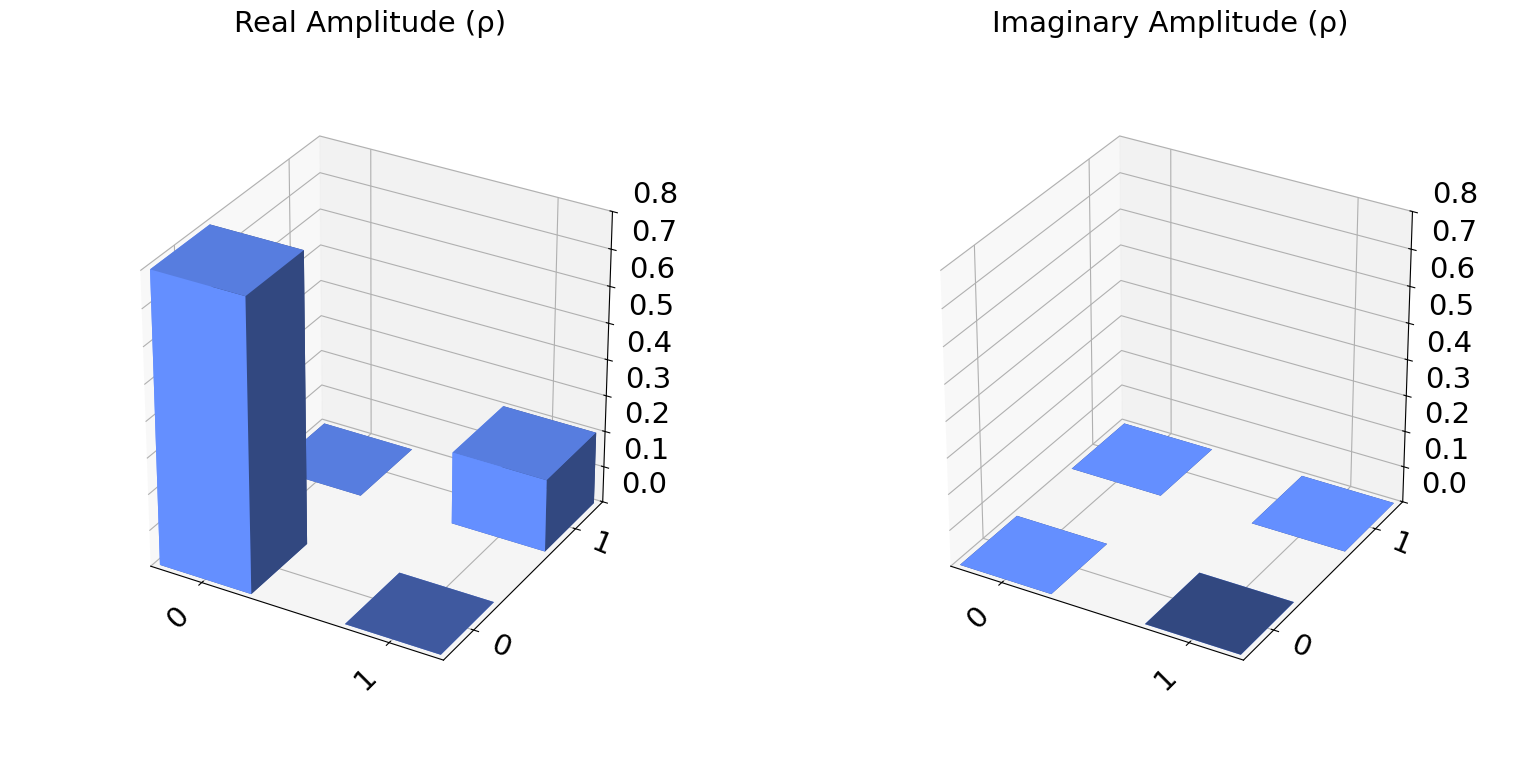

In [22]:
plot_state_city(rho)

In [23]:
# (b)
rho=0.3*rho_0+0.7*rho_1
purity_calculated=calculate_purity(rho)
purity_builtin=rho.purity()
print(f"Calculated Purity = {purity_calculated:.6f}")
Built_in=rho.purity()
print(f"Built-in Purity = {Built_in:.6f}")


Calculated Purity = 0.580000+0.000000j
Built-in Purity = 0.580000+0.000000j


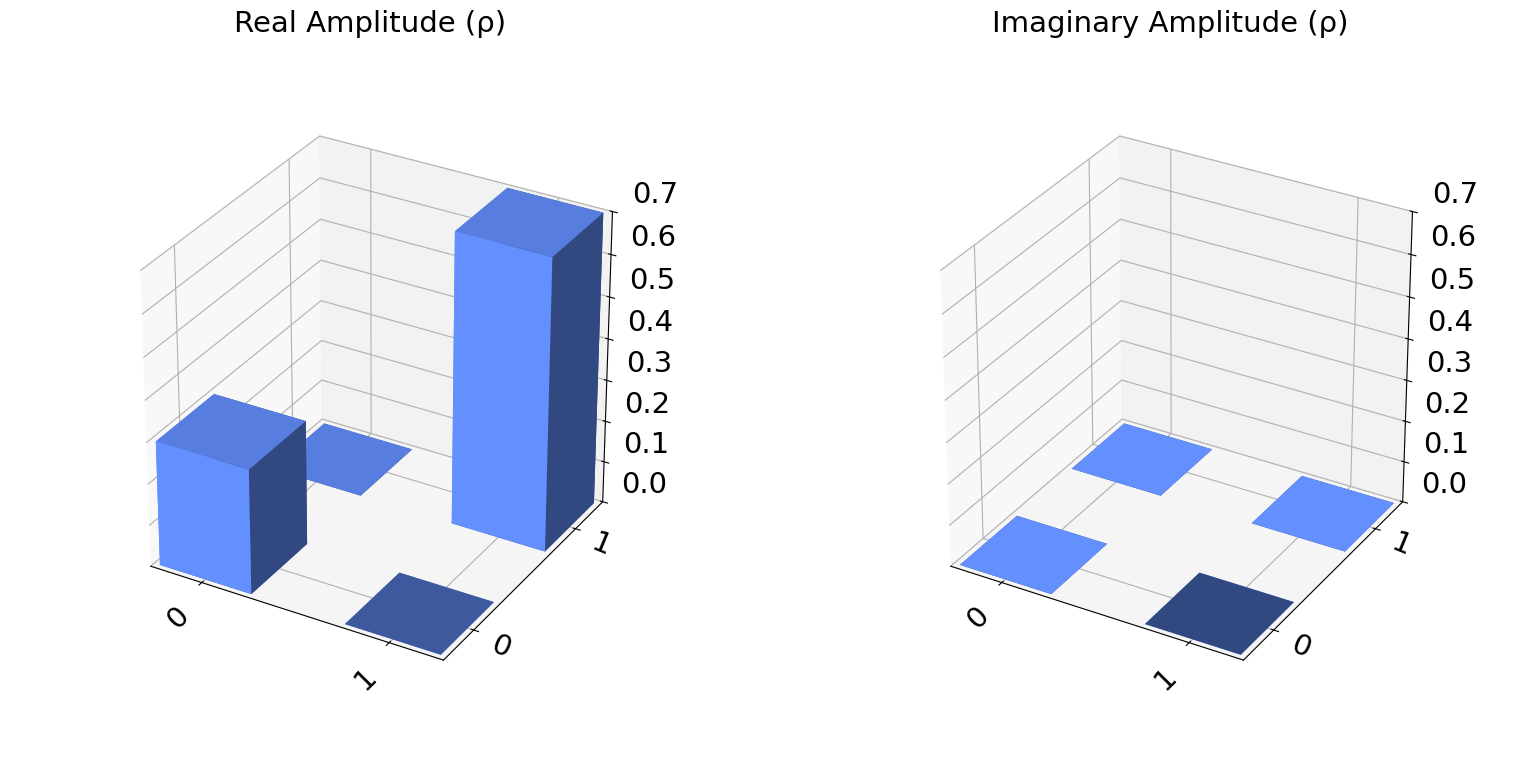

In [24]:
plot_state_city(rho)

In [25]:
# (c)
rho=0.45*rho_0+0.55*rho_1
purity_calculated=calculate_purity(rho)
purity_builtin=rho.purity()
print(f"|0> : Calculated Purity = {purity_calculated:.6f}")
Built_in=rho.purity()
print(f"|0> : Built-in Purity = {Built_in:.6f}")


|0> : Calculated Purity = 0.505000+0.000000j
|0> : Built-in Purity = 0.505000+0.000000j


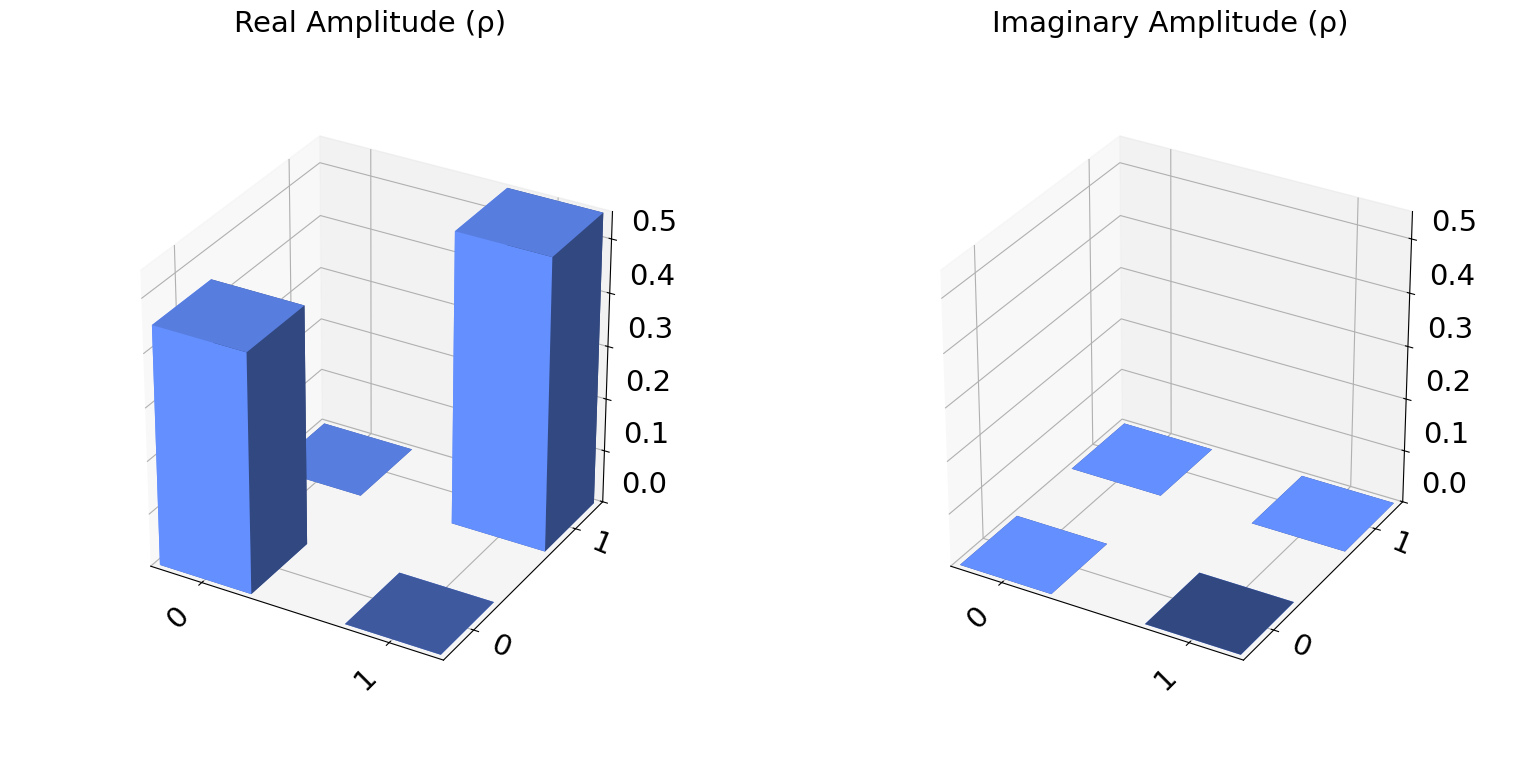

In [26]:
plot_state_city(rho)

#### Mathematical pattern
For the diagonal mixture ρ = p|0⟩⟨0| + (1−p)|1⟩⟨1| the purity is less than 1. It is given by

Purity(p) = Tr(ρ²) = p² + (1−p)² = 2p² − 2p + 1.


## Question 2:
Consider these two states:
#### State A: (√0.7|0⟩ + √0.3|1⟩) [pure state]
#### State B: 70% |0⟩, 30% |1⟩ [mixed state]
For each state:
1. Construct the density matrix
2. Calculate trace and purity
3. Plot city plots
4. Explain why they have the same diagonal elements but different purity.

In [27]:
rho_0=DensityMatrix.from_label('0')
rho_1=DensityMatrix.from_label('1')

In [28]:
psi = Statevector([np.sqrt(0.7), np.sqrt(0.3)])

rho_A = DensityMatrix(psi)

trace_A = np.trace(rho_A.data)
purity_calculated=calculate_purity(rho_A)
purity_builtin=rho_A.purity()
Built_in=rho_A.purity()

print("Density Matrix for State A (Pure State):\n", rho_A.data)
print(f"\nTrace(ρ_A) = {trace_A:.3f}")
print(f"Calculated Purity = {purity_calculated:.6f}")
print(f"Built-in Purity = {Built_in:.6f}")

Density Matrix for State A (Pure State):
 [[0.7       +0.j 0.45825757+0.j]
 [0.45825757+0.j 0.3       +0.j]]

Trace(ρ_A) = 1.000+0.000j
Calculated Purity = 1.000000+0.000000j
Built-in Purity = 1.000000+0.000000j


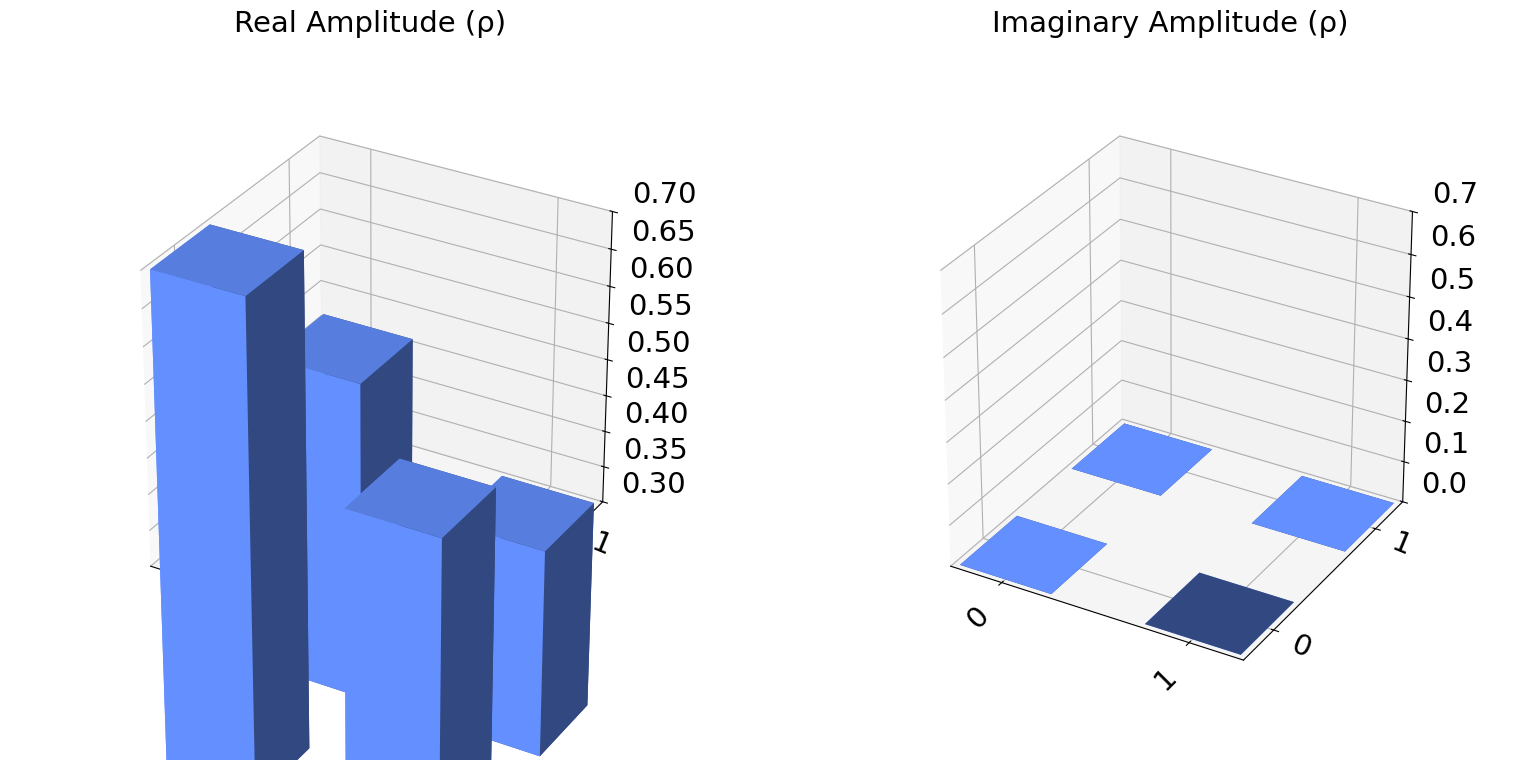

In [29]:
plot_state_city(rho_A)

In [30]:
rho_B = 0.7*rho_0 + 0.3*rho_1

trace_B = np.trace(rho_B.data)
purity_calculated=calculate_purity(rho_B)
purity_builtin=rho_B.purity()
Built_in=rho_B.purity()

print("Density Matrix for State A (Pure State):\n", rho_B.data)
print(f"\nTrace(ρ_A) = {trace_B:.3f}")
print(f"Calculated Purity = {purity_calculated:.6f}")
print(f"Built-in Purity = {Built_in:.6f}")

Density Matrix for State A (Pure State):
 [[0.7+0.j 0. +0.j]
 [0. +0.j 0.3+0.j]]

Trace(ρ_A) = 1.000+0.000j
Calculated Purity = 0.580000+0.000000j
Built-in Purity = 0.580000+0.000000j


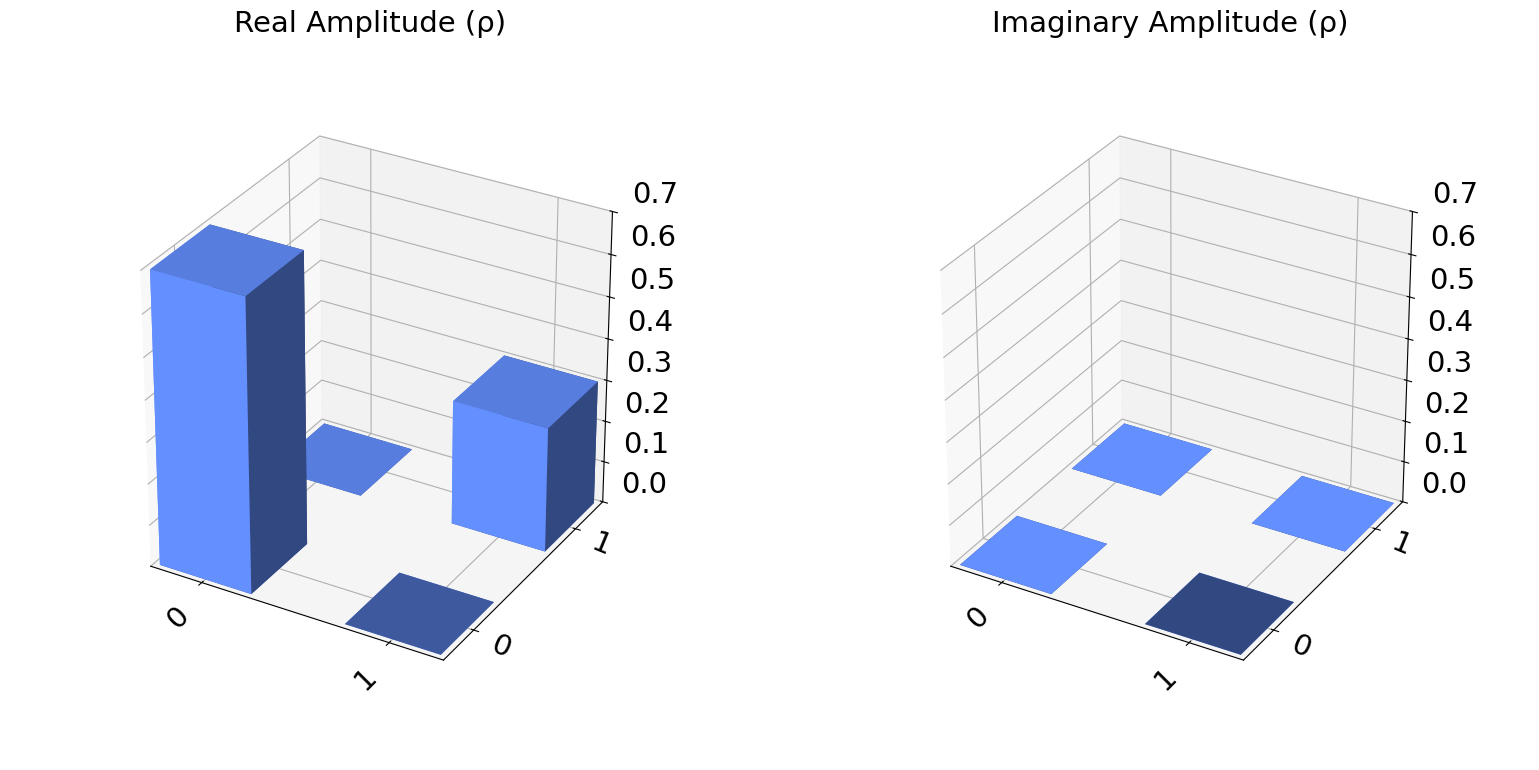

In [31]:
plot_state_city(rho_B)

The off-diagonal elements in the density matrix represent quantum coherence — i.e., the presence of superposition between the basis states.

## Question 3:
Create these 2-qubit states:
1. |00⟩ (product state)
2. |0+⟩ (product state)
3. (|00⟩ + |11⟩)/√2 (Bell state)
4. (|00⟩ + |01⟩ + |10⟩ + |11⟩)/2 (GHZ-like state)
For each state:
#### a) Calculate purity of the full system
#### b) Use partial trace to find purity of first qubit
#### c) Use partial trace to find purity of second qubit
What pattern emerges about entanglement and subsystem purity?

In [32]:
def print_purities(name, state):
    print(f"\n{name}")
    rho = DensityMatrix(state)

    # (a) Full system purity
    print(f"a) Full system purity : {rho.purity():.3f}")

    # (b) Partial trace over qubit 1 → reduced density matrix of qubit 0
    rho_qubit0 = partial_trace(rho, [1])
    print(f"b) Qubit 0 purity after partial trace : {rho_qubit0.purity():.3f}")

    # (c) Partial trace over qubit 0 → reduced density matrix of qubit 1
    rho_qubit1 = partial_trace(rho, [0])
    print(f"c) Qubit 1 purity after partial trace : {rho_qubit1.purity():.3f}")

In [33]:
# 1) |00>
rho_00 = DensityMatrix.from_label('00')
print_purities("|00>", rho_00)


|00>
a) Full system purity : 1.000+0.000j
b) Qubit 0 purity after partial trace : 1.000+0.000j
c) Qubit 1 purity after partial trace : 1.000+0.000j


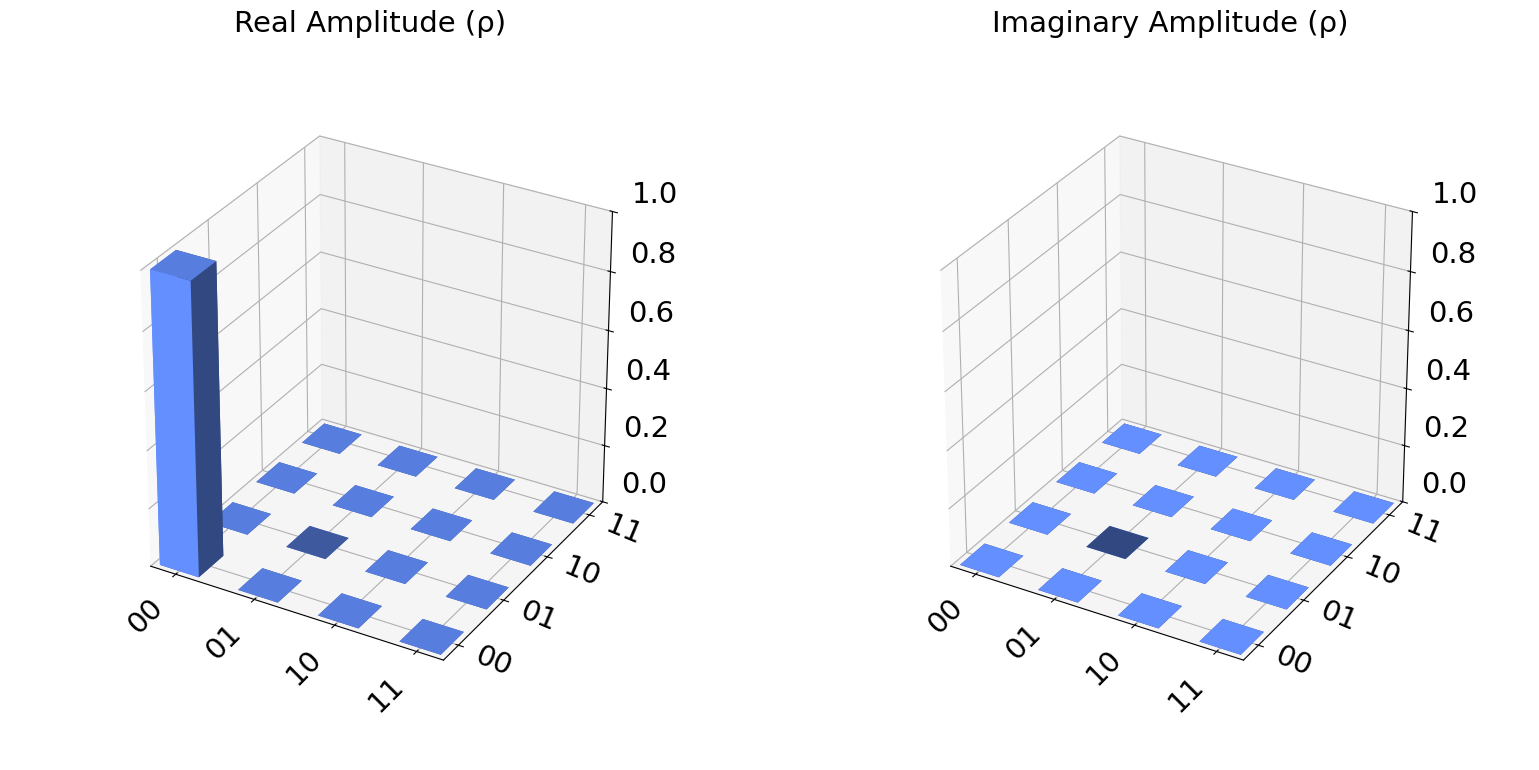

In [34]:
plot_state_city(rho_00)

In [35]:
# 2) |0+⟩ using QuantumCircuit
qc = QuantumCircuit(2)
qc.h(1)
state_0plus = Statevector.from_instruction(qc)
rho_0plus = DensityMatrix(state_0plus)

print_purities("|0+⟩", state_0plus)


|0+⟩
a) Full system purity : 1.000+0.000j
b) Qubit 0 purity after partial trace : 1.000+0.000j
c) Qubit 1 purity after partial trace : 1.000+0.000j


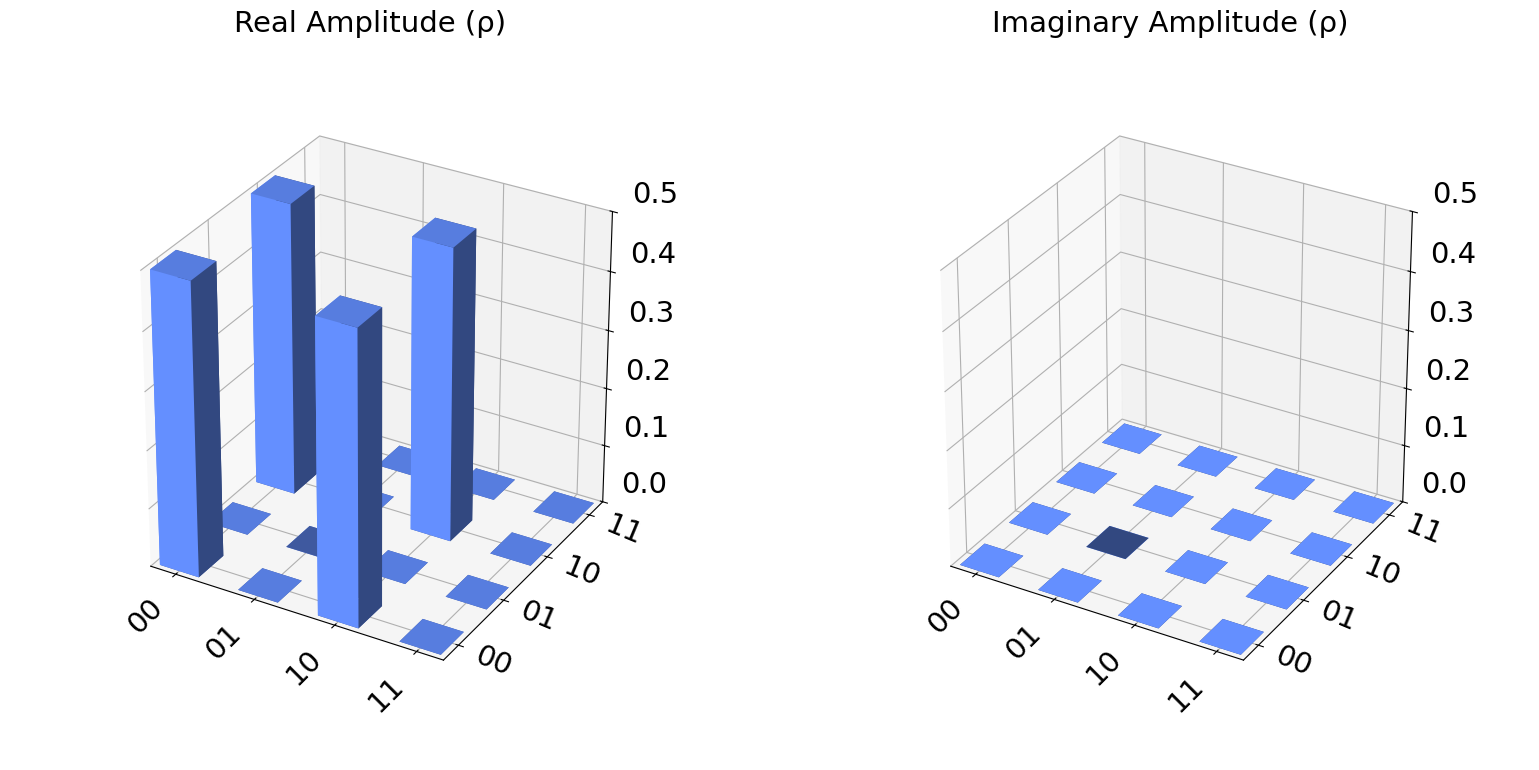

In [36]:
plot_state_city(rho_0plus)

In [37]:
# 3) Bell: (|00>+|11>)/sqrt(2)
qc=QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
bell_state=Statevector.from_instruction(qc)
rho_bell=DensityMatrix(bell_state)
print_purities("Bell (|00>+|11>)/√2", rho_bell)


Bell (|00>+|11>)/√2
a) Full system purity : 1.000+0.000j
b) Qubit 0 purity after partial trace : 0.500+0.000j
c) Qubit 1 purity after partial trace : 0.500+0.000j


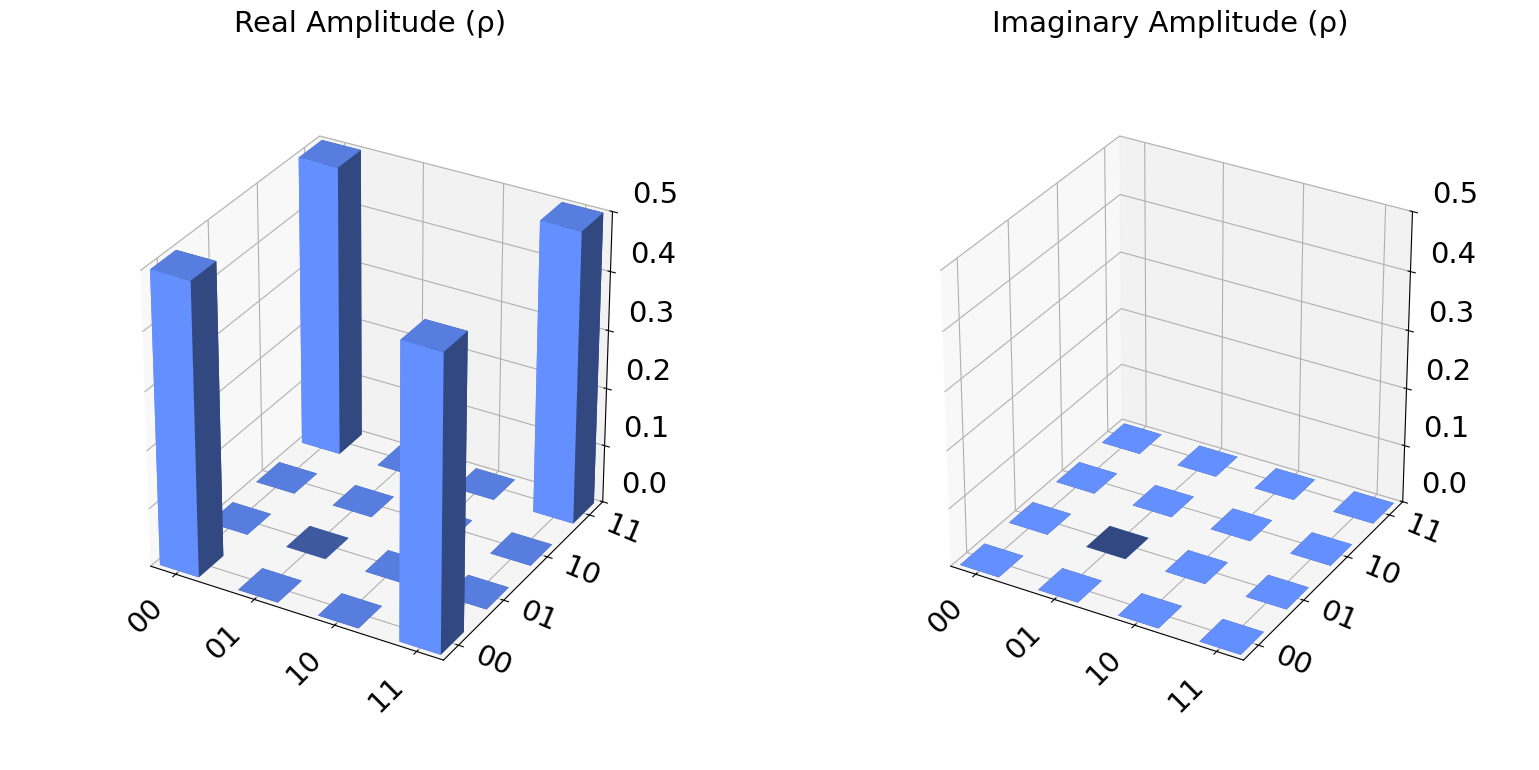

In [38]:
plot_state_city(rho_bell)

In [39]:
# 4) Equal superposition (|00> + |01> + |10> + |11>)/2 == |+>|+>
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
state_plus_plus = Statevector.from_instruction(qc)
rho_plus_plus = DensityMatrix(state_plus_plus)

print_purities("(|00>+|01>+|10>+|11>)/2  (|+>|+>)", state_plus_plus)


(|00>+|01>+|10>+|11>)/2  (|+>|+>)
a) Full system purity : 1.000+0.000j
b) Qubit 0 purity after partial trace : 1.000+0.000j
c) Qubit 1 purity after partial trace : 1.000+0.000j


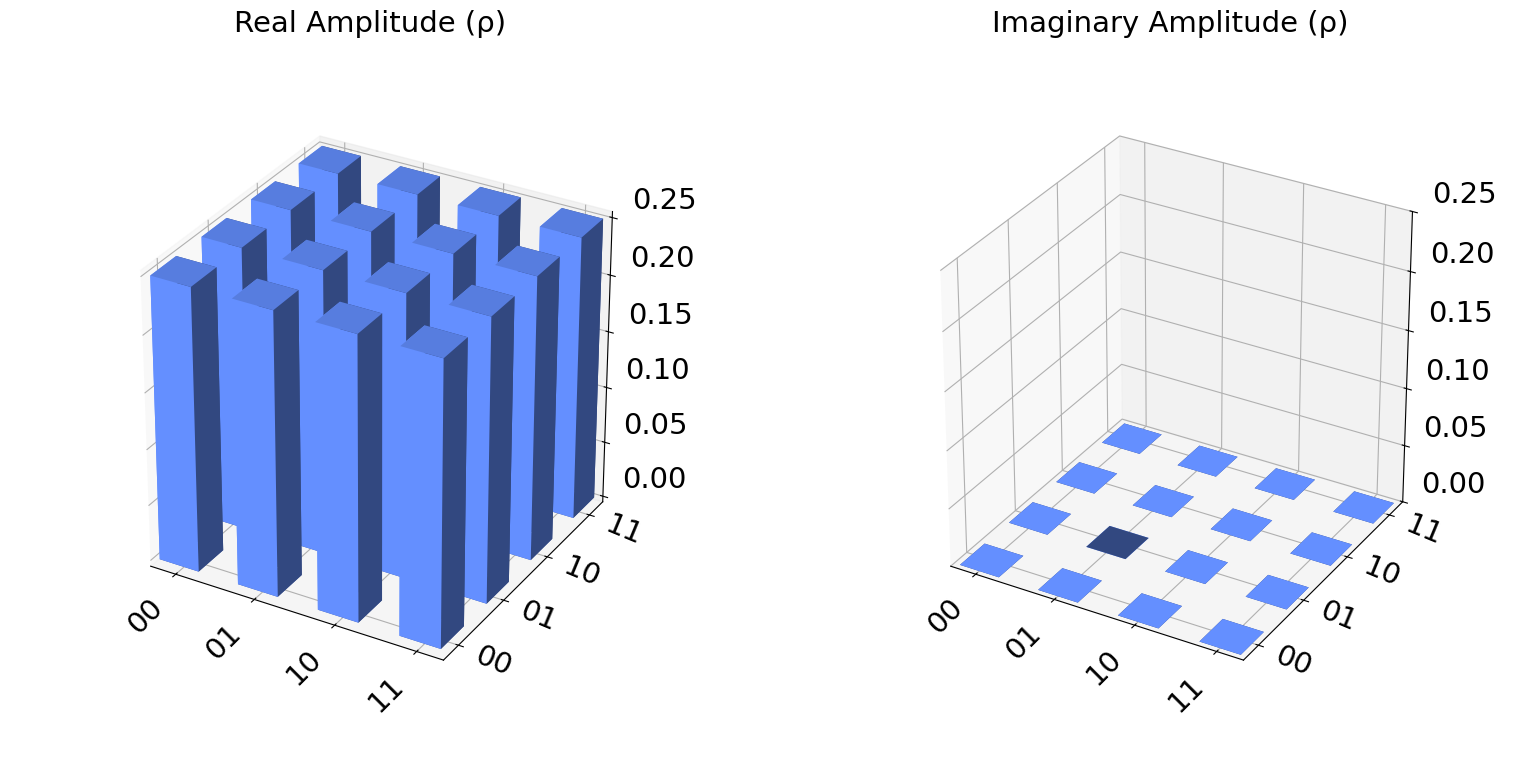

In [40]:
plot_state_city(rho_plus_plus)

When examining two-qubit systems, the overall state always remains pure, but the purity of individual qubits reveals whether entanglement is present. In product (non-entangled) states like
∣00⟩ or ∣0+⟩, each qubit retains full purity since their states are independent. However, in entangled states such as the Bell state
(∣00⟩+∣11⟩)/√2, tracing out one qubit makes the remaining qubit appear mixed, reducing its purity. This shows that entanglement distributes quantum information across qubits, causing each subsystem to lose local purity even though the combined system remains perfectly pure.

## Question 4
#### Create the state (|00⟩ + |01⟩)/√2
#### Calculate the purity of the full 2-qubit system
#### Use partial trace to find the state of just the first qubit
#### What is its purity? Is it mixed? Why or why not?

In [41]:
qc = QuantumCircuit(2)
qc.h(1)
state = Statevector.from_instruction(qc)

print_purities("(|00>+|01>)/√2", state)

rho = DensityMatrix(state)


(|00>+|01>)/√2
a) Full system purity : 1.000+0.000j
b) Qubit 0 purity after partial trace : 1.000+0.000j
c) Qubit 1 purity after partial trace : 1.000+0.000j


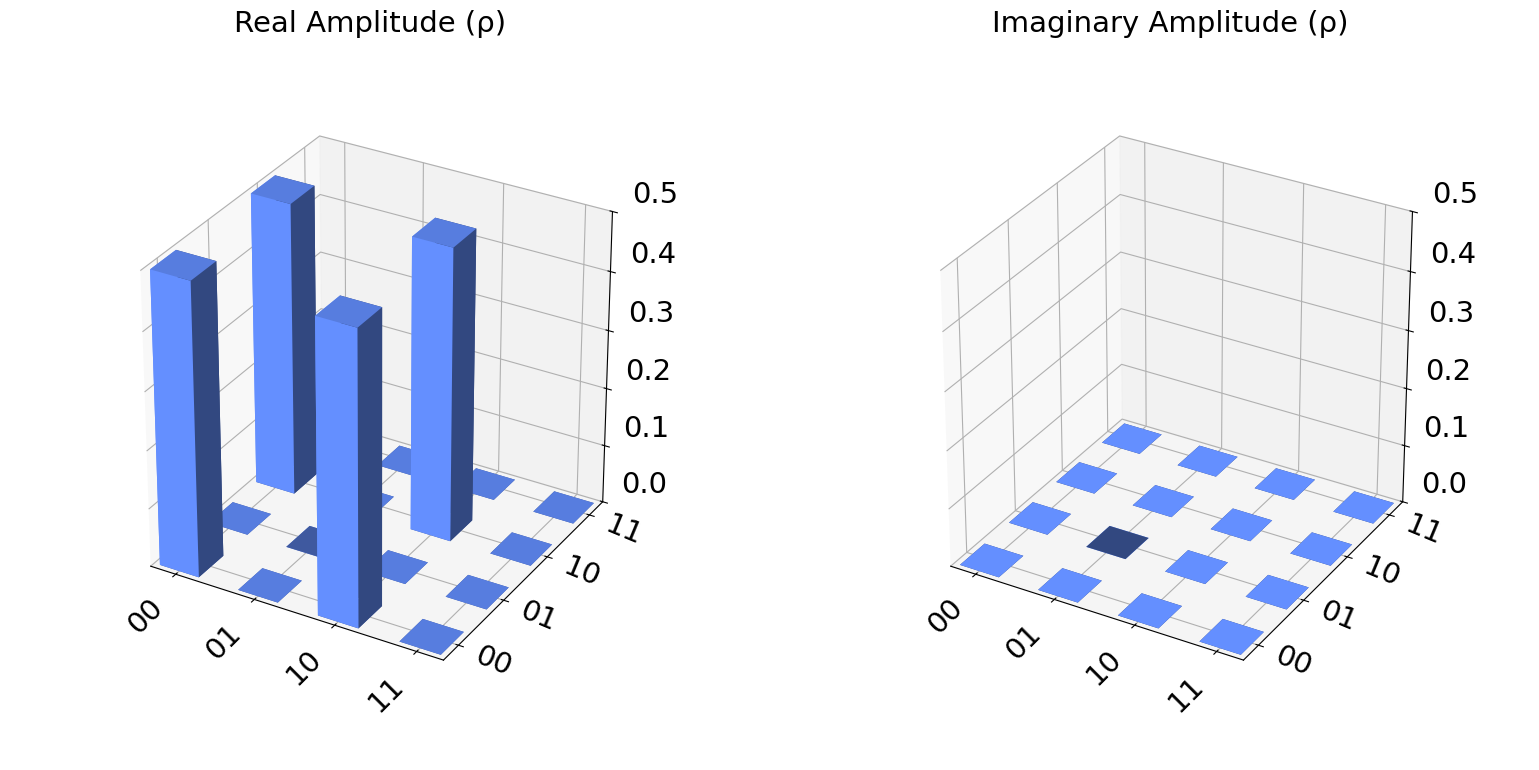

In [42]:
plot_state_city(rho)

It is a pure state, as the Tr(ρ^2) = 1.

The first qubit remains pure (purity = 1) because the state
(∣00⟩+∣01⟩)/√2=∣0⟩∣+⟩ is a product state with no entanglement between the qubits.

## Question 5
#### Create a mixed state that is 40% |0⟩ and 60% |1⟩
#### Calculate its purity and trace
#### Now create the pure state √0.4|0⟩ + √0.6|1⟩
#### Calculate its purity and trace
#### Plot city plots for both and explain the difference

In [43]:
rho_A = 0.4*rho_0 + 0.6*rho_1

trace_A = np.trace(rho_A.data)
purity_calculated=calculate_purity(rho_A)
purity_builtin=rho_A.purity()
Built_in=rho_A.purity()

print("Density Matrix for State A (Pure State):\n", rho_A.data)
print(f"\nTrace(ρ_A) = {trace_A:.3f}")
print(f"Calculated Purity = {purity_calculated:.6f}")
print(f"Built-in Purity = {Built_in:.6f}")

Density Matrix for State A (Pure State):
 [[0.4+0.j 0. +0.j]
 [0. +0.j 0.6+0.j]]

Trace(ρ_A) = 1.000+0.000j
Calculated Purity = 0.520000+0.000000j
Built-in Purity = 0.520000+0.000000j


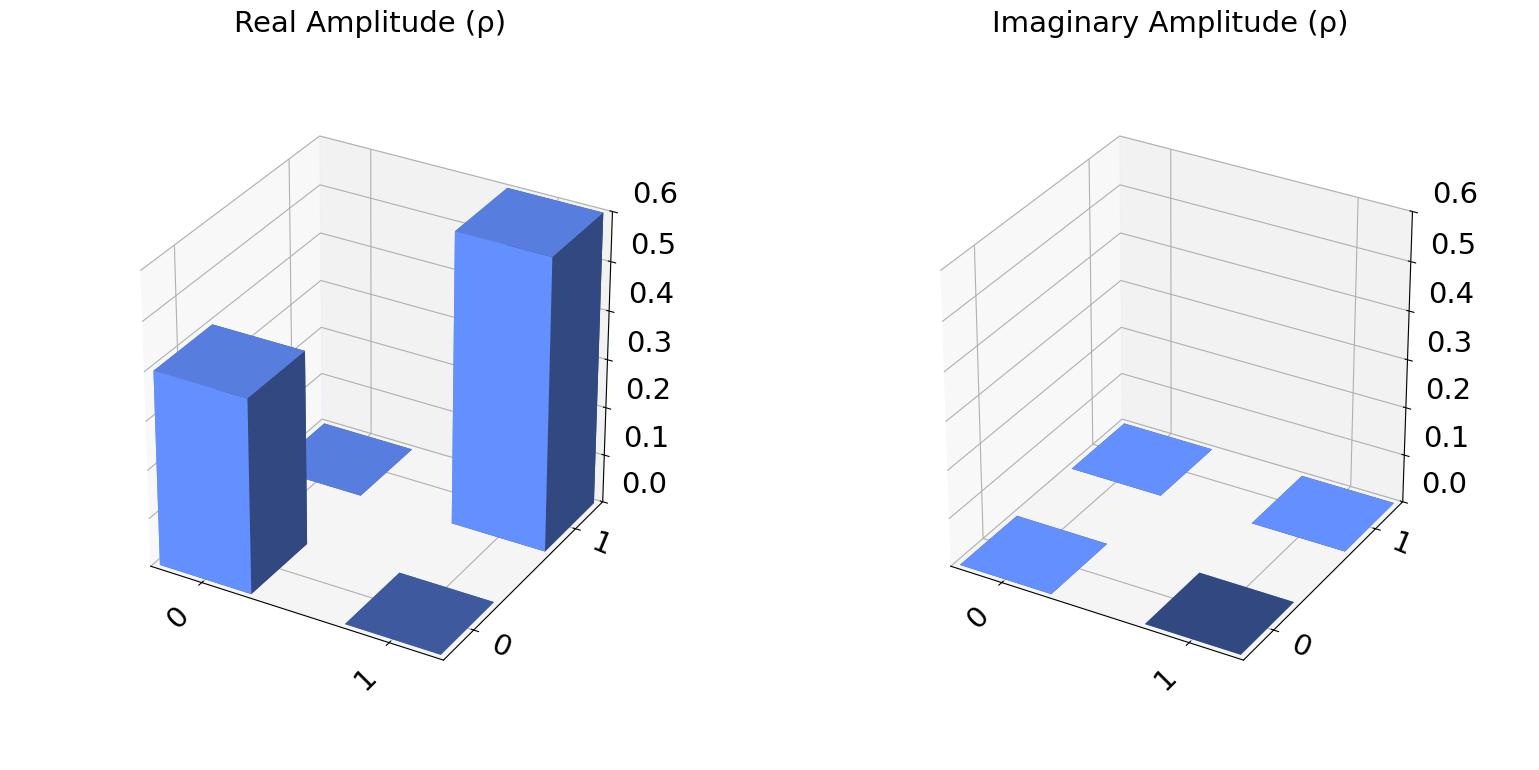

In [44]:
plot_state_city(rho_A)

In [45]:
psi = Statevector([np.sqrt(0.4), np.sqrt(0.6)])

rho_B = DensityMatrix(psi)

trace_A = np.trace(rho_B.data)
purity_calculated=calculate_purity(rho_B)
purity_builtin=rho_B.purity()
Built_in=rho_B.purity()

print("Density Matrix for State A (Pure State):\n", rho_B.data)
print(f"\nTrace(ρ_A) = {trace_B:.3f}")
print(f"Calculated Purity = {purity_calculated:.6f}")
print(f"Built-in Purity = {Built_in:.6f}")

Density Matrix for State A (Pure State):
 [[0.4       +0.j 0.48989795+0.j]
 [0.48989795+0.j 0.6       +0.j]]

Trace(ρ_A) = 1.000+0.000j
Calculated Purity = 1.000000+0.000000j
Built-in Purity = 1.000000+0.000000j


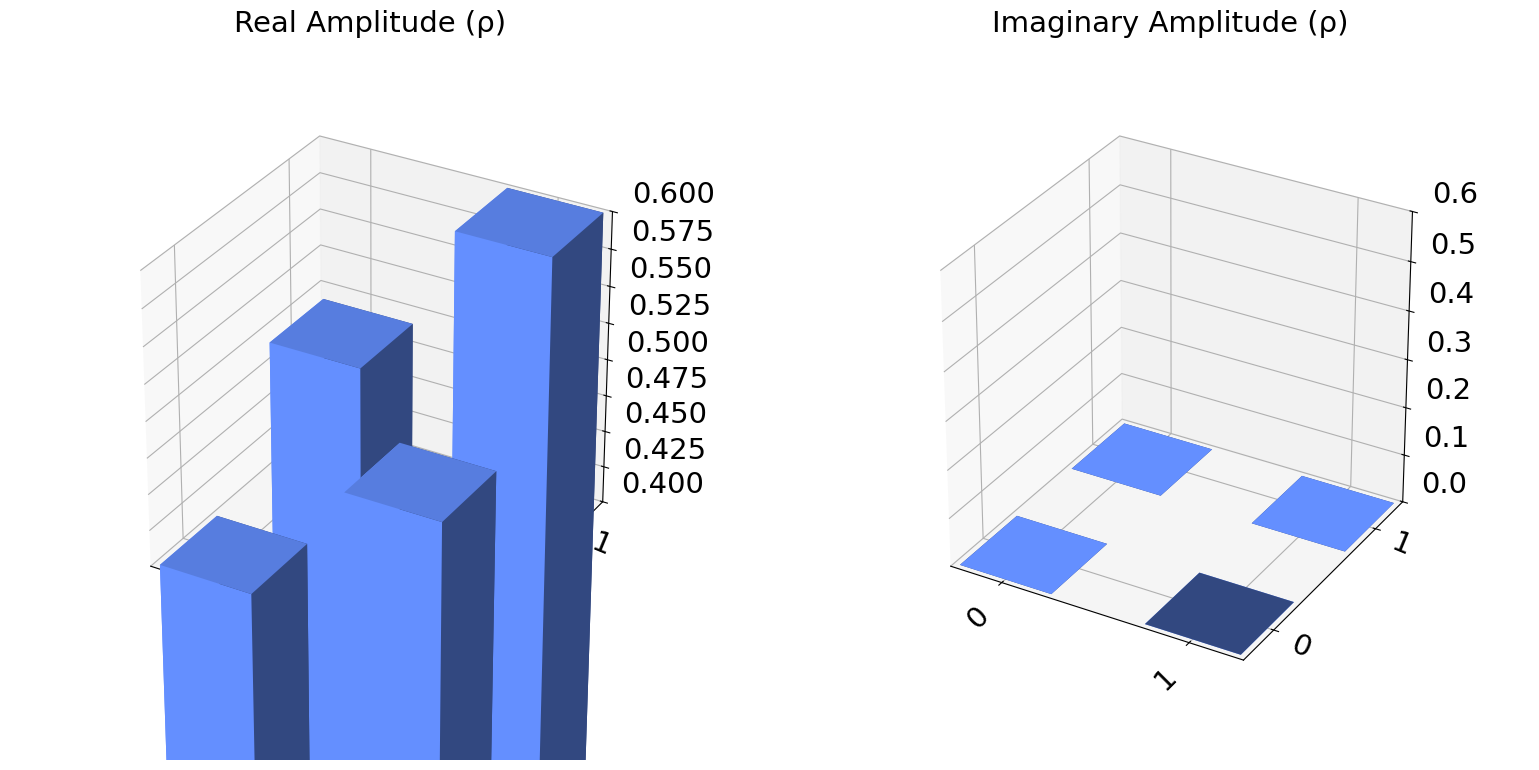

In [46]:
plot_state_city(rho_B)

The off-diagonal elements in the density matrix represent quantum coherence — i.e., the presence of superposition between the basis states.

## Question 6
#### Write a function that takes an angle θ and creates the state cos(θ)|0⟩ + sin(θ)|1⟩
#### Create an entangled state from this: cos(θ)|00⟩ + sin(θ)|11⟩
#### Plot how the purity of the first qubit (after partial trace) changes with θ
#### At what angles do you get maximally mixed states? Pure states?

In [47]:

def purity(theta):
    qc = QuantumCircuit(2)
    qc.ry(2*theta, 0)   # Creates cos(θ)|0> + sin(θ)|1>
    qc.cx(0, 1)         # Creates cos(θ)|00> + sin(θ)|11>

    state = Statevector.from_instruction(qc)
    rho = DensityMatrix(state)
    rho_A = partial_trace(rho, [1])    # purity of the first qubit (after partial trace)

    purity_val = np.real(np.trace(rho_A.data @ rho_A.data))

    print(f"\nθ = {theta:.2f} radians")
    print("Statevector:")
    print(state)
    print(f"Purity of first qubit: {purity_val:.3f}")

    return purity_val, rho, rho_A

In [48]:
theta = float(input("Enter angle θ (in radians): "))
purity, rho, rho_A=purity(theta)

Enter angle θ (in radians): 1.57

θ = 1.57 radians
Statevector:
Statevector([7.96326711e-04+0.j, 0.00000000e+00+0.j, 0.00000000e+00+0.j,
             9.99999683e-01+0.j],
            dims=(2, 2))
Purity of first qubit: 1.000


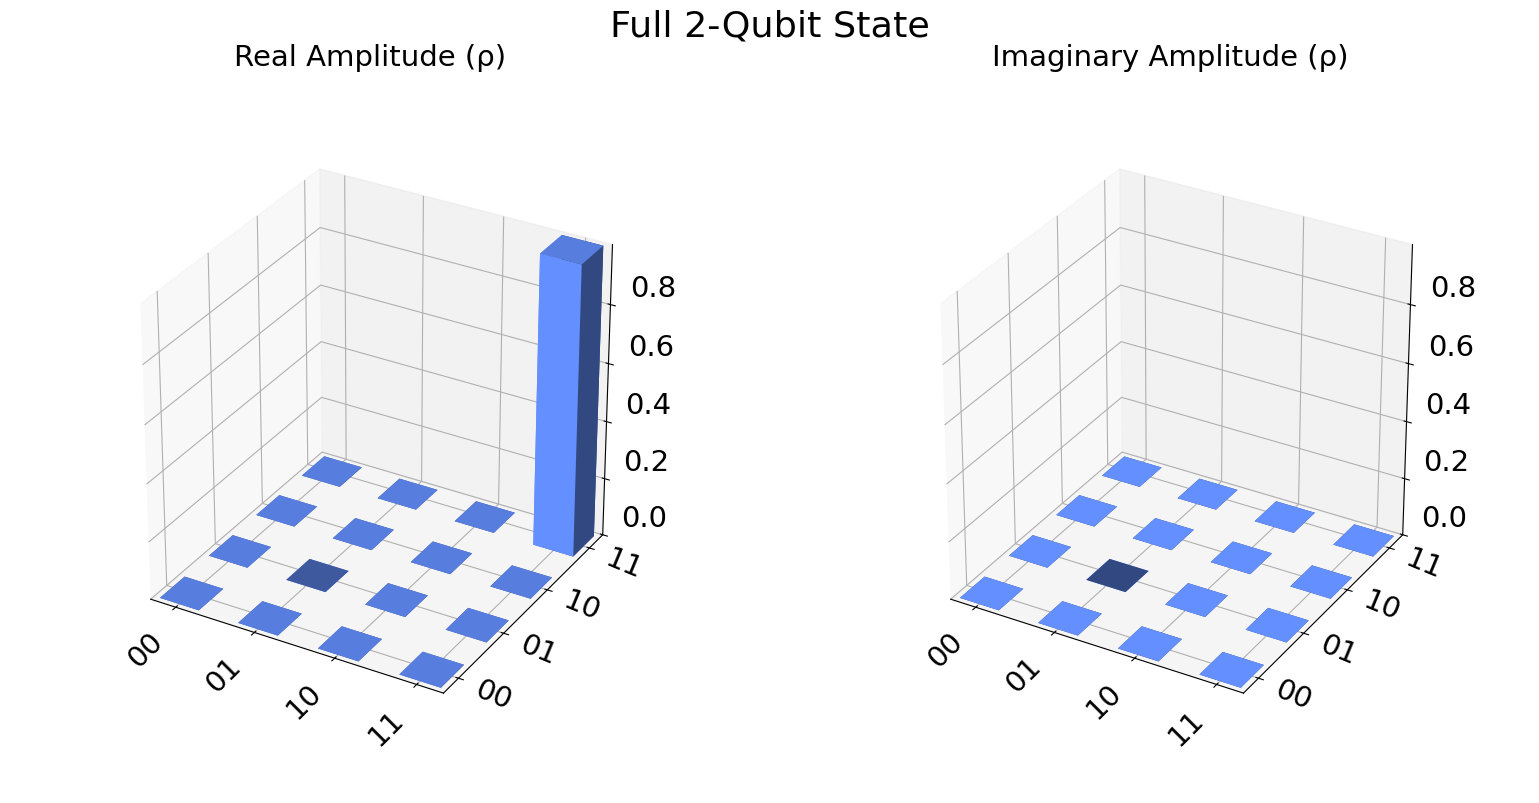

In [49]:
plot_state_city(rho, title="Full 2-Qubit State")

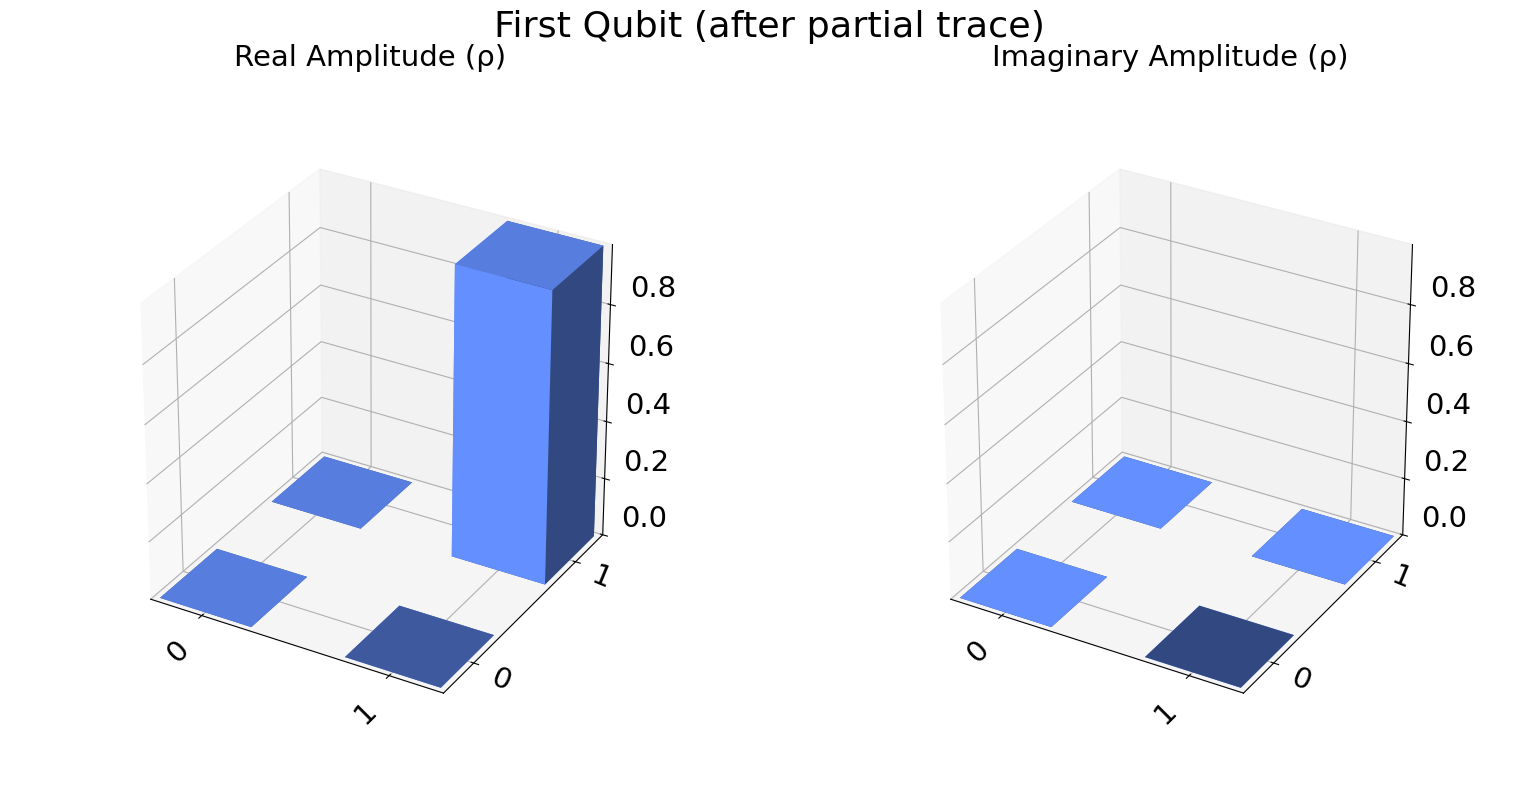

In [50]:
plot_state_city(rho_A, title="First Qubit (after partial trace)")